## Data analysis of Strathclyde Refit Data

### Set Up

### Import Required Libraries

In [7]:
#conda install matplotlib --force # Reinstall matplotlib in case of running errors

%matplotlib inline
#from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import pandas as pd
import seaborn as sns
import os

In [23]:
fp=r'C:\Users\cvyb\OneDrive - Loughborough University\ERBE_YB\Energy Analysis\Course Work\CLEAN_REFIT_081116'

## Data processing

### This loads the data, resamples it to half hour intervals and saves the new data files.

In [8]:
mydir = os.chdir('/Users/cvyb\OneDrive - Loughborough University/ERBE_YB/Energy Analysis/Course Work/CLEAN_REFIT_081116')

In [9]:
myFile = os.listdir(mydir)
myFile2 = os.path.splitext(myFile[1])[0].rsplit('_', 1)[1]
#myFile2.rsplit('_', 1)[1]
myFile[1:5]

#testName = os.path.splitext(myFile)[0]#.rsplit('_', 1)[1]

['CLEAN_House10.csv',
 'CLEAN_House11.csv',
 'CLEAN_House12.csv',
 'CLEAN_House13.csv']

In [33]:
#for fileName in os.listdir(mydir):
    #splitFileName = os.path.splitext(fileName)[0].rsplit('_', 1)[1]
    #addFileName = os.path.join(fp,filename)
    #print(splitFileName)

In [10]:
myData0 = (pd.read_csv('CLEAN_House10.csv', usecols = ['Time', 'Aggregate'], index_col = 'Time', parse_dates=['Time'])
          .resample('D').mean()
          .rename(columns = {'Aggregate': 'AggregatePower_Watts'})
          )


In [11]:
myData = (myData0
          .assign(AggregatePower_kW = myData0['AggregatePower_Watts'] / 1000)
          .assign(TestHouse = myFile2)
          #.fillna(None, method = 'ffill')
          #.fillna(.mean())['AggregatePower_Watts', 'AggregatePower_kW']
          #.fillna(method = 'ffill')
          #.to_numeric(self["AggregatePower_Watts"])
          )

myData = myData.fillna(myData.mean())

In [12]:
#myData.info()

In [13]:
#myData.isnull().sum()

In [14]:
list_of_files = ['CLEAN_House1.csv',
 'CLEAN_House10.csv',
 'CLEAN_House11.csv',
 'CLEAN_House12.csv',
 'CLEAN_House13.csv',
 'CLEAN_House15.csv',
 'CLEAN_House16.csv',
 'CLEAN_House17.csv',
 'CLEAN_House18.csv',
 'CLEAN_House19.csv',
 'CLEAN_House2.csv',
 'CLEAN_House20.csv',
 'CLEAN_House21.csv',
 'CLEAN_House3.csv',
 'CLEAN_House4.csv',
 'CLEAN_House5.csv',
 'CLEAN_House6.csv',
 'CLEAN_House7.csv',
 'CLEAN_House8.csv',
 'CLEAN_House9.csv']

In [15]:
for fileName in list_of_files:
    splitFileName = os.path.splitext(fileName)[0].rsplit('_', 1)[1]
    print(splitFileName)

House1
House10
House11
House12
House13
House15
House16
House17
House18
House19
House2
House20
House21
House3
House4
House5
House6
House7
House8
House9


In [52]:
#for filename in list_of_files:
    #print(filename)

In [50]:
#myFile

In [88]:
data_container = []

for filename in list_of_files:
    print(filename)
    splitFileName = os.path.splitext(filename)[0].rsplit('_', 1)[1]
        
    mydf0 = (pd.read_csv(filename, usecols = ['Time', 'Aggregate'], index_col = 'Time', parse_dates=['Time'])
          .resample('M').mean()
          .rename(columns = {'Aggregate': 'AggregatePower_Watts'}))
    
    mydf1 = (mydf0
          .assign(AggregatePower_kW = mydf0['AggregatePower_Watts'] / 1000)
          .assign(TestHouse = splitFileName)
          #.fillna(None, method = 'pad')
          )
    mydf = mydf1.fillna(mydf1.mean())
    
    data_container.append(mydf)
    
all_data = pd.concat(data_container, axis = 0)
#all_data["TestHouse"] = pd.Categorical(all_data.TestHouse)

all_data.to_csv('output/all_data.csv')

CLEAN_House1.csv
CLEAN_House10.csv
CLEAN_House11.csv
CLEAN_House12.csv
CLEAN_House13.csv
CLEAN_House15.csv
CLEAN_House16.csv
CLEAN_House17.csv
CLEAN_House18.csv
CLEAN_House19.csv
CLEAN_House2.csv
CLEAN_House20.csv
CLEAN_House21.csv
CLEAN_House3.csv
CLEAN_House4.csv
CLEAN_House5.csv
CLEAN_House6.csv
CLEAN_House7.csv
CLEAN_House8.csv
CLEAN_House9.csv


In [109]:
all_data.tail()

,AggregatePower_Watts,AggregatePower_kW,TestHouse
Time,,,
2015-03-31,643.013194,0.643013,House9
2015-04-30,520.036702,0.520037,House9
2015-05-31,568.134787,0.568135,House9
2015-06-30,478.783661,0.478784,House9
2015-07-31,502.985215,0.502985,House9


### Visualisation 

In [87]:
#plt.figure(figsize = (15,7))

#myplot = sns.lineplot(x = "Time",
                     #y = "AggregatePower_kW",
                     #data = all_data.reset_index()#, hue = "TestHouse"
                     #)

In [27]:
#plt.figure(figsize = (15,7))

#p1 = sns.relplot(x = "Time",
                     #y = "AggregatePower_kW",
                     #data = all_data.reset_index(), 
                    # kind = "line"
                     #)

In [84]:
all_data["TestHouse"] = pd.Categorical(all_data.TestHouse)
#all_data.info()

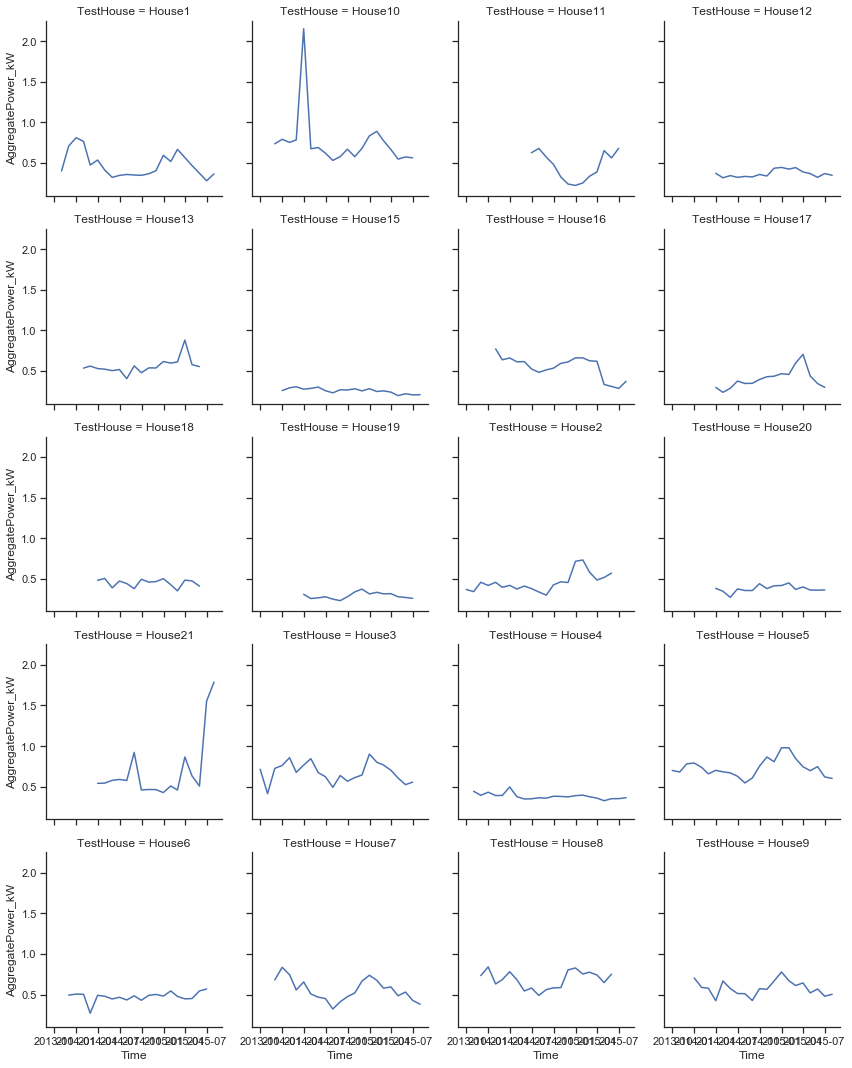

In [113]:
#sns.set(style = "ticks", color_codes = True)
#no_of_houses = all_data["TestHouse"].nunique()

p0 = all_data.reset_index()
p1 = sns.FacetGrid(p0, col = "TestHouse", col_wrap = 4)
#p2 = p1.map(plt.plot, "Time", "AggregatePower_kW")
p2 = p1.map_dataframe(sns.lineplot, "Time", "AggregatePower_kW")

#define date format
#date_form = mdates.DateFormatter("%b-%Y")
#ax.xaxis.set_major_formatter(date_form)
plt.show()


In [107]:
no_of_houses = all_data["TestHouse"].nunique()#.value_counts()
no_of_houses

20

In [54]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10900 entries, 2013-10-09 to 2015-07-08
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   AggregatePower_Watts  10900 non-null  float64 
 1   AggregatePower_kW     10900 non-null  float64 
 2   TestHouse             10900 non-null  category
dtypes: category(1), float64(2)
memory usage: 266.9 KB


In [69]:
a = all_data[["AggregatePower_Watts", "AggregatePower_kW"]]
a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10900 entries, 2013-10-09 to 2015-07-08
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AggregatePower_Watts  10900 non-null  float64
 1   AggregatePower_kW     10900 non-null  float64
dtypes: float64(2)
memory usage: 255.5 KB


In [96]:
b = (all_data
     .resample('M').sum()
    )
all_data.info(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 376 entries, 2013-10-31 to 2015-07-31
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AggregatePower_Watts  376 non-null    float64
 1   AggregatePower_kW     376 non-null    float64
 2   TestHouse             376 non-null    object 
dtypes: float64(2), object(1)
memory usage: 11.8+ KB
